# Experiment transforms
Transforms are objects that aim to "transform" the experiment object or the data contained therein to a new experiment object by applying a set of data transformations.

You can thus view your workflow as a series of transformations on your Experiment object.

The transform API is based on two methods on the Experiment object. The first method is called 'apply'.
The second method is called 'dapply' (short for "dataframe apply" or "data apply"). These methods apply your various *Transform* objects onto your Experiment.


These methods work by calling the following corresponding methods on the Transform objects: ____eapply____ and ____dapply____.

The Transform ____eapply____ method (short for "experiment apply") should always return a new Experiment object. As explained before, this paradigm is need to  allow method chaining and pipelining of transforms aka "the Fluent interface".

applied using the **apply** method.


The *____dapply____* method (short for "dataframe apply" or "data apply") is an additional method on the Transform object that could be provided as a shorthand for a particular dataframe or set of data to be returned when the Fluent interface is not needed. Typically, this method returns a new pandas DataFrame object (for example the new "transformed" or "modified" data_df). If not implemented, this method should return NotImplementedError.

Examples of transforms are listed in this notebook/chapter.

In [1]:
%load_ext autoreload
%autoreload 2

#Load our data
from omicexperiment.experiment.microbiome import MicrobiomeExperiment

mapping = "example_map.tsv"
biom = "example_fungal.biom"
tax = "blast_tax_assignments.txt"

exp = MicrobiomeExperiment(biom, mapping,tax)

In [2]:
exp.data_df

,1234,9876,sample0,sample1,sample2
2f328e48f4252bbade0dd7f66b0d5bf1b09617dd,0,225872,0,2,0
ae0ddda08027454fdb5db77c96b94691b8274cdd,2,1,0,91911,100428
8f52abc02aed2ce6c63be04570a7e609f9cdac5f,133138,0,0,21,0
3cb3c2347cdbe128b645e432f4dcbca702e0e8e3,0,0,0,0,0
8e9a3b9a9d91e86f21da1bd57b8ae4486c78bbe0,0,0,86870,0,0


In [3]:
exp.mapping_df

,#SampleID,BarcodeSequence,LinkerPrimerSequence,Description,patient_id,group,asthma,vas,amplicon_conc
#SampleID,,,,,,,,,
sample0,sample0,ACTGAGCG,AAAA,sample0,132,CRSsNP,0,49,4.3
sample1,sample1,AAGAGGCA,AAAA,sample1,315,CRSwNP,1,43,2.3
sample2,sample2,ATCTCAGG,AAAA,sample2,742,CRSsNP,0,23,3.2
1234,1234,ATGCGCAG,AAAA,1234,927,control,1,87,1.0
9876,9876,TAGGCATG,AAAA,9876,538,CRSwNP,1,12,1.3


## The apply function
The apply function can process three different types of parameters:
1. The first type of parameter is to pass a Transform object (or class).

2. The second type of parameter is to pass a function (which accepts a pandas DataFrame, intended here to be the experiment's data_df). The reason for the decision to make this type of function accept a dataframe, rather than an OmicExperiment object is to make the apply functionality compatible with various pandas and numpy aggregate functions like sum, mean etc.

3. The third type of parameter is a list of Transform objects.

### The Relative Abundance Transform

In [4]:
from omicexperiment.transforms.general import RelativeAbundance
exp.apply(RelativeAbundance) #note how the apply method it returns a new experiment

In [5]:
exp.apply(RelativeAbundance).data_df #peak into the transformed data

,1234,9876,sample0,sample1,sample2
2f328e48f4252bbade0dd7f66b0d5bf1b09617dd,0.000000,99.999557,0,0.002175,0
ae0ddda08027454fdb5db77c96b94691b8274cdd,0.001502,0.000443,0,99.974982,100
8f52abc02aed2ce6c63be04570a7e609f9cdac5f,99.998498,0.000000,0,0.022842,0
3cb3c2347cdbe128b645e432f4dcbca702e0e8e3,0.000000,0.000000,0,0.000000,0
8e9a3b9a9d91e86f21da1bd57b8ae4486c78bbe0,0.000000,0.000000,100,0.000000,0


### The Rarefaction Transform
Here is another example.
A rarefaction transform rarefies our experiment to a desired cutoff.
All samples below this cutoff are discarded from the _data_ DataFrame.

In [6]:
from omicexperiment.transforms.general import Rarefaction
exp.apply(Rarefaction(90000)).data_df

,1234,9876,sample1,sample2
2f328e48f4252bbade0dd7f66b0d5bf1b09617dd,0,89998,0,0
8f52abc02aed2ce6c63be04570a7e609f9cdac5f,89999,0,27,0
ae0ddda08027454fdb5db77c96b94691b8274cdd,1,2,89973,90000


In [7]:
#Here you can see how the Transform API contract works
Rarefaction(90000).__eapply__(exp)

#the above is more or less equivalent to
#exp.apply(Rarefaction(90000))

In [8]:
#a shorthand on the MicrobiomeExperiment object -- the rarefy method
exp.rarefy(90000).data_df

,1234,9876,sample1,sample2
2f328e48f4252bbade0dd7f66b0d5bf1b09617dd,0,90000,1,0
8f52abc02aed2ce6c63be04570a7e609f9cdac5f,89998,0,12,0
ae0ddda08027454fdb5db77c96b94691b8274cdd,2,0,89987,90000


The rarefaction functions can also take a num_reps argument (default=1), to set the number of randomizations run.

In [9]:
exp.apply(Rarefaction(n=90000, num_reps=10)).data_df #takes longer of course ;)

,1234,9876,sample1,sample2
2f328e48f4252bbade0dd7f66b0d5bf1b09617dd,0,90000,2,0
8f52abc02aed2ce6c63be04570a7e609f9cdac5f,89999,0,16,0
ae0ddda08027454fdb5db77c96b94691b8274cdd,1,0,89982,90000


### Examples of other Transforms

#### The SampleGroupBy Transform

In [10]:
# The SampleGroupBy Transform
#the aggregate function here is the mean
from omicexperiment.transforms.sample import SampleGroupBy
exp.dapply(SampleGroupBy("group"))

group,CRSsNP,CRSwNP,control
2f328e48f4252bbade0dd7f66b0d5bf1b09617dd,0,112937.0,0
ae0ddda08027454fdb5db77c96b94691b8274cdd,50214,45956.0,2
8f52abc02aed2ce6c63be04570a7e609f9cdac5f,0,10.5,133138
3cb3c2347cdbe128b645e432f4dcbca702e0e8e3,0,0.0,0
8e9a3b9a9d91e86f21da1bd57b8ae4486c78bbe0,43435,0.0,0


In [11]:
# we can also change the aggfunc from mean to sum
import numpy as np
exp.dapply(SampleGroupBy("group", aggfunc=np.sum))

group,CRSsNP,CRSwNP,control
2f328e48f4252bbade0dd7f66b0d5bf1b09617dd,0,225874,0
ae0ddda08027454fdb5db77c96b94691b8274cdd,100428,91912,2
8f52abc02aed2ce6c63be04570a7e609f9cdac5f,0,21,133138
3cb3c2347cdbe128b645e432f4dcbca702e0e8e3,0,0,0
8e9a3b9a9d91e86f21da1bd57b8ae4486c78bbe0,86870,0,0


#### The ClusterObservations Transform

The main argument to supply to this transform is a *clusters_df* DataFrame with two columns (Series). The first column should be labeled 'observation' and the second column should be labeled 'cluster'.

It will then reindex your experiments dataframe using the provided clusters_df then perform a groupby on the 'cluster' column using the supplied aggregate function (default is np.sum).

The use case here of course is for OTU clustering.

In [12]:
from pandas import DataFrame, Series
otus = exp.data_df.index
print([o for o in otus])
clusters_df = DataFrame({'observation': Series(otus), 'cluster': ['otu1','otu2','otu1','otu1','otu2']})
print(clusters_df)

from omicexperiment.transforms.observation import ClusterObservations

otu_cluster_transform = ClusterObservations(clusters_df)

exp.dapply(otu_cluster_transform)

['2f328e48f4252bbade0dd7f66b0d5bf1b09617dd', 'ae0ddda08027454fdb5db77c96b94691b8274cdd', '8f52abc02aed2ce6c63be04570a7e609f9cdac5f', '3cb3c2347cdbe128b645e432f4dcbca702e0e8e3', '8e9a3b9a9d91e86f21da1bd57b8ae4486c78bbe0']
  cluster                               observation
0    otu1  2f328e48f4252bbade0dd7f66b0d5bf1b09617dd
1    otu2  ae0ddda08027454fdb5db77c96b94691b8274cdd
2    otu1  8f52abc02aed2ce6c63be04570a7e609f9cdac5f
3    otu1  3cb3c2347cdbe128b645e432f4dcbca702e0e8e3
4    otu2  8e9a3b9a9d91e86f21da1bd57b8ae4486c78bbe0


,1234,9876,sample0,sample1,sample2
cluster,,,,,
otu1,133138,225872,0,23,0
otu2,2,1,86870,91911,100428


#### The BinObservations Transform

You supply this transform with a list of observations and a corresponding group name. It will then 'bin' or 'collapse' (or group etc) these observations into a group using the supplied aggregate function (default is np.sum). It is a subclass of the ClusterObservations Transform.


The most common example use case is if you want to bin a particular set of OTUs below a certain percentage of reads or relative abundance or you want to bin all OTUs except the top 10 or 20 into a group called 'Other'.

In [13]:
from omicexperiment.transforms.observation import BinObservations

exp.dapply(
BinObservations(['ae0ddda08027454fdb5db77c96b94691b8274cdd', \
                 '3cb3c2347cdbe128b645e432f4dcbca702e0e8e3', \
                 '8f52abc02aed2ce6c63be04570a7e609f9cdac5f'], groupnames='Other')
)

,1234,9876,sample0,sample1,sample2
2f328e48f4252bbade0dd7f66b0d5bf1b09617dd,0,225872,0,2,0
8e9a3b9a9d91e86f21da1bd57b8ae4486c78bbe0,0,0,86870,0,0
Other,133140,1,0,91932,100428


#### Taxonomy transforms
Taxonomy transforms allows common operations done on the taxonomy metadata of the Observations/OTUs.

In [14]:
from omicexperiment.transforms.taxonomy import TaxonomyGroupBy

#this is an important Transform, as it is used to collapse otus by their taxonomies
#according to the taxonomic rank asked for
exp.dapply(TaxonomyGroupBy('genus')) #any taxonomic rank can be passed

,1234,9876,sample0,sample1,sample2
genus,,,,,
g__Aspergillus,2,225873,0,91913,100428
g__Lewia,0,0,86870,0,0
g__unidentified (f__Pleosporaceae),133138,0,0,21,0


### Applying a list of Transforms in sequence
Passing in a list which contains transforms objects/classes chains the transforms in sequence on our experiment.

In [15]:
exp.apply([Rarefaction(90000), RelativeAbundance]).data_df

,1234,9876,sample1,sample2
2f328e48f4252bbade0dd7f66b0d5bf1b09617dd,0.000000,100,0.001111,0
8f52abc02aed2ce6c63be04570a7e609f9cdac5f,99.996667,0,0.021111,0
ae0ddda08027454fdb5db77c96b94691b8274cdd,0.003333,0,99.977778,100


Another very basic transform is the number of unique observations in each sample.
This is essentially the _"Number of Observed OTUs"_, or when used for species, can be described as _"species richness"_.

In [16]:
#%matplotlib inline
from omicexperiment.transforms.observation import NumberUniqueObservations
exp.apply(NumberUniqueObservations).data_df

,1234,9876,sample0,sample1,sample2
number_unique_obs,2,2,1,3,1


*Note how when we implement a Transform, we try to follow the convention of samples being in the columns rather than the rows (Take a look at the source code!)*

### Applying a numpy aggregate function
Passing in a function object (for example, numpy's sum or mean functions) to apply can be thought of as equivalent to the following apply operation on the data_df:

    DataFrame( experiment.data_df.apply(func) )
    
Also available is the axis parameter to pass to the apply function of the data_df (Default axis=0 i.e. columns):

    DataFrame( experiment.data_df.apply(func, axis=axis) )

In [17]:
import numpy as np
exp.apply(np.mean).data_df
#Note that a transpose() is done on the DataFrame in the inside of
#the apply method, such that sample names remain as columns.

,1234,9876,sample0,sample1,sample2
0,26628,45174.6,17374,18386.8,20085.6


### Rarefaction Functions
The RarefactionFunction transform allows us to apply a function on a rarefied dataframe.

Let us use this functionality to apply an alpha diversity function to our data.

The scikit-bio diversity package is an excellent resource for alpha diversity functions (http://scikit-bio.org/docs/latest/diversity.html).

In [18]:
from omicexperiment.transforms.general import RarefactionFunction
from skbio.diversity import alpha

#we pass the function to the func argument
#the axis to apply to is 0 by default (i.e. on columns = samples)
shannon_rf = RarefactionFunction(n=90000, num_reps=10, func=alpha.shannon, axis=0)

shannon = exp.apply(shannon_rf).data_df

shannon

1234      9876   sample1  sample2
rarefaction rep                                       
90000       0    0.000199  0.000199  0.003122       -0
            1    0.000199 -0.000000  0.002531       -0
            2   -0.000000 -0.000000  0.003122       -0
            3   -0.000000  0.000199  0.002427       -0
            4   -0.000000 -0.000000  0.003152       -0
            5   -0.000000 -0.000000  0.003992       -0
            6   -0.000000 -0.000000  0.003551       -0
            7   -0.000000 -0.000000  0.003696       -0
            8    0.000199 -0.000000  0.003589       -0
            9    0.000376 -0.000000  0.002192       -0

In [19]:
#this time we pass the np.mean() function function to the agg_rep argument, to aggregate the results
shannon_rf = RarefactionFunction(n=90000, num_reps=10, func=alpha.shannon, axis=0, agg_rep=np.mean)
shannon = exp.apply(shannon_rf).data_df
shannon #now note how the result produces one result row at the intended rarefaction level.

,1234,9876,sample1,sample2
rarefaction,,,,
90000,0.000244,0.000115,0.003457,0


Not a very elegant curve for this example dataset, but you get the point!

Note how the resulting dataframe is structured.
The index now is a MultiIndex with rarefaction and rep levels.
At each repetition, the function is applied to the rarefaction level chosen.

We can however, aggregate/collapse these repetitions by passing in the agg_rep argument.

## Rarefaction curves
Rarefaction curves is a very common transformation for microbiome amplicon studies and is utilized widely in the software package qiime. In omicexperiment, Rarefaction curves are implemented as a generalization of RarefactionFunction at multiple levels of rarefaction.

It is also a transform, the **RarefactionCurveFunction**.
**RarefactionCurveFunction** allows us to pass functions not only to one rarefaction level (like the *RarefactionFunction*), but to multiple rarefaction levels (i.e. a curve). The RarefactionCurveFunction constructor signature is the same as for RarefactionFunction, but it needs an additional *step* argument to specify the levels of rarefaction desired between *0* and *n*.

The RarefactionCurveFunction constructor takes the following four main parameters:
1. The rarefaction curve cutoff level _n_. (Any sample with lower count than this cutoff will be dropped.)
2. The 'num_reps': number of randomizations done at each level. 
3. The 'step': from 0 to the cutoff. For example, a cutoff value of 1000 and a step of 100 will rarefy at levels 0,100,200,300...,900,1000.
4. The function to apply: the function to apply on the dataframe at each rarefaction level (as well as the axis) 

The end result is demonstrated below. In the example below, we run the "Number of Unique Observations Transform" (i.e. observed_otus, or richness) on each level of the curve.

In [20]:
#the function is called number_unique_obs in the transforms subpackage
from omicexperiment.transforms.general import RarefactionCurveFunction
from omicexperiment.transforms.observation import number_unique_obs

num_obs_curve = RarefactionCurveFunction(n=90001, num_reps=1, step=30000, func=number_unique_obs, axis=0)
exp.apply(num_obs_curve).data_df

,1234,9876,sample1,sample2
rarefaction,,,,
0,0,0,0,0
30000,1,1,2,1
60000,2,1,2,1
90000,1,1,2,1


We can also use this method to calculate alpha diversity measures as a curve, analogous to the way we used them with RarefactionFunction.

In [21]:
from omicexperiment.transforms.general import RarefactionCurveFunction

#construct a curve with a step of 10000 (0 --> n 90000)
#note we add 1 here to include the last level 90000, as the function uses np.arange internally
shannon_curve = RarefactionCurveFunction(n=90001, num_reps=10, step=10000, func=alpha.shannon, axis=0, agg_rep=np.mean)
exp.apply(shannon_curve).data_df

,1234,9876,sample1,sample2
rarefaction,,,,
0,NaN,NaN,NaN,NaN
10000,0.000000,0.000000,0.004648,0
20000,0.000079,0.000079,0.003608,0
30000,0.000109,0.000109,0.003568,0
40000,0.000162,0.000042,0.003445,0
50000,0.000231,0.000102,0.003444,0
60000,0.000253,0.000191,0.003485,0
70000,0.000235,0.000075,0.003312,0
80000,0.000111,0.000044,0.003680,0


In [22]:
#again if you wish, you could not pass the agg_rep argument to keep the
#results of your repetitions in the resulting dataframe
shannon_curve = RarefactionCurveFunction(n=90001, num_reps=10, step=10000, func=alpha.shannon)
exp.apply(shannon_curve).data_df

1234      9876   sample1  sample2
rarefaction rep                                       
0           0         NaN       NaN       NaN      NaN
            1         NaN       NaN       NaN      NaN
            2         NaN       NaN       NaN      NaN
            3         NaN       NaN       NaN      NaN
            4         NaN       NaN       NaN      NaN
            5         NaN       NaN       NaN      NaN
            6         NaN       NaN       NaN      NaN
            7         NaN       NaN       NaN      NaN
            8         NaN       NaN       NaN      NaN
            9         NaN       NaN       NaN      NaN
10000       0   -0.000000 -0.000000  0.004219       -0
            1   -0.000000 -0.000000  0.005092       -0
            2   -0.000000 -0.000000  0.003944       -0
            3   -0.000000 -0.000000  0.001473       -0
            4   -0.000000 -0.000000  0.002946       -0
            5   -0.000000 -0.000000  0.004219       -0
            6   -0.000000 -0.000000 -0.000000       -0
            7   -0.000000 -0.000000  0.001473       -0
            8    0.001473 -0.000000  0.005092       -0
            9   -0.000000 -0.000000  0.001473       -0
20000       0   -0.000000 -0.000000  0.001473       -0
            1   -0.000000 -0.000000  0.002122       -0
            2    0.000787 -0.000000  0.004523       -0
            3   -0.000000 -0.000000  0.003944       -0
            4    0.000787 -0.000000  0.003352       -0
            5   -0.000000  0.000787  0.003944       -0
            6   -0.000000 -0.000000  0.000787       -0
            7   -0.000000 -0.000000  0.003352       -0
            8    0.000787 -0.000000  0.004523       -0
            9    0.001473 -0.000000  0.003352       -0
...                   ...       ...       ...      ...
70000       0    0.001087  0.000473  0.004583       -0
            1    0.000251 -0.000000  0.003605       -0
            2   -0.000000 -0.000000  0.001912       -0
            3    0.000888 -0.000000  0.003266       -0
            4   -0.000000 -0.000000  0.003219       -0
            5    0.000251 -0.000000  0.003437       -0
            6    0.000251 -0.000000  0.003778       -0
            7    0.000251 -0.000000  0.002642       -0
            8    0.000251  0.000251  0.003437       -0
            9    0.000684  0.000473  0.003171       -0
80000       0    0.000222 -0.000000  0.003807       -0
            1    0.000418 -0.000000  0.002592       -0
            2    0.000222 -0.000000  0.003797       -0
            3    0.000605 -0.000000  0.004107       -0
            4    0.000418  0.000222  0.004014       -0
            5    0.000222 -0.000000  0.004549       -0
            6    0.000418 -0.000000  0.003273       -0
            7    0.000222 -0.000000  0.002698       -0
            8    0.000222  0.000222  0.003273       -0
            9    0.000222  0.000222  0.004068       -0
90000       0    0.000199  0.000376  0.002427       -0
            1    0.000376  0.000199  0.002882       -0
            2    0.000544 -0.000000  0.002708       -0
            3    0.000376 -0.000000  0.003290       -0
            4    0.000544 -0.000000  0.003152       -0
            5    0.000199 -0.000000  0.003484       -0
            6    0.000376 -0.000000  0.002985       -0
            7    0.000376  0.000199  0.001995       -0
            8    0.000199 -0.000000  0.003178       -0
            9    0.000376 -0.000000  0.003426       -0

[100 rows x 4 columns]

### Plot Rarefaction curves?
For the sake of fun (and science!), you will find that we can very easily, using minimal code, plot a RarefactionCurveFunction dataframe as an actual rarefaction curves plot. The following simplistic example is a demo, awaiting a proper implementation of rarefaction curves in omicexperiment!!

Index(['1234', '9876', 'sample1', 'sample2'], dtype='object')


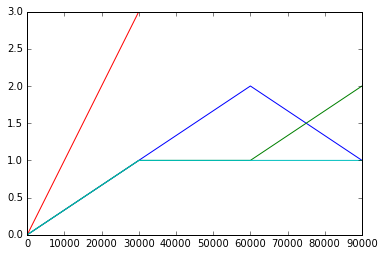

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

#here we plot a richness (number of otus) plot.
num_obs_curve = RarefactionCurveFunction(n=90001, num_reps=1, step=30000, func=number_unique_obs, axis=0)
curve_df = exp.apply(num_obs_curve).data_df

print(curve_df.columns)

for sample in curve_df:
    plt.plot(curve_df.index, curve_df[sample])

### Distance Matrix transforms

Distance Matrix transforms internally utilize the cdist function from scipy.spatial

The cdist function accepts either a string for the builtin functions already provided in scipy
(see http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.spatial.distance.cdist.html)
or it can accept a function (which accepts two arguments - calculating the distance between them).

The DistanceMatrix Transform constructor accepts the metric (string or function), as explained just above.

In [24]:
from omicexperiment.transforms.general import DistanceMatrix

rarefied_90000 = exp.rarefy(90000, num_reps=10)

rarefied_90000.apply(DistanceMatrix('braycurtis')).data_df

,1234,9876,sample1,sample2
1234,0.000000,1.000000,0.999756,1.000000
9876,1.000000,0.000000,0.999978,1.000000
sample1,0.999756,0.999978,0.000000,0.000267
sample2,1.000000,1.000000,0.000267,0.000000


You can then apply PCoA on the resulting distance matrix dataframe. Here we utilize sci-kit bio's implementation.

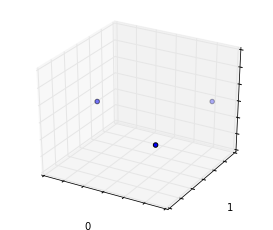

In [25]:
from skbio.stats.ordination import pcoa
pcoa_results = pcoa(rarefied_90000.apply(DistanceMatrix('braycurtis')).data_df)
pcoa_results

PCoA is also implemented in omicexperiment as a Transform. It is based on the excellent sci-kit bio's implementation, with minor changes.

In [26]:
from omicexperiment.transforms.ordination import PCoA
bray_curtis_90000 = rarefied_90000.apply(DistanceMatrix('braycurtis'))
pcoa_bray_curtis_90000 = bray_curtis_90000.apply(PCoA)
pcoa_bray_curtis_90000.data_df

,1234,9876,sample1,sample2
PC1,0.432782,0.433167,-4.328972e-01,-0.433051
PC2,-0.500111,0.499889,-1.570092e-15,0.000222
PC3,-0.000000,-0.000000,-0.000000e+00,-0.000000
PC4,0.000000,-0.000000,-0.000000e+00,0.000000


PC1    0.749867
PC2    0.500000
PC3    0.000000
PC4    0.000000
dtype: float64


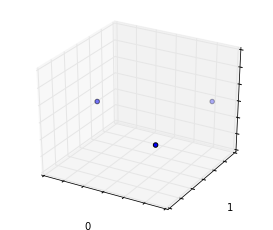

In [27]:
#the scikit-bio OrdinationResults object is stored in the experiment's metadata dict under the key 'pcoa'
print(pcoa_bray_curtis_90000.metadata['pcoa'].eigvals)
pcoa_bray_curtis_90000.metadata['pcoa']

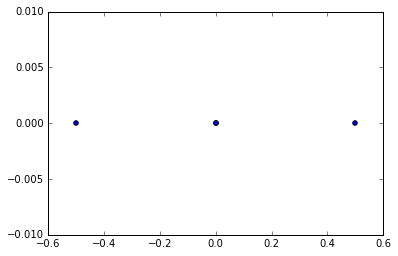

In [28]:
#Plot 2nd vs 3rd principal coordinate
from matplotlib import pyplot
pyplot.scatter(pcoa_bray_curtis_90000.data_df.loc['PC2'], pcoa_bray_curtis_90000.data_df.loc['PC3'])

# TODO
